In [37]:
import itertools
import random
import numpy as np


1) Consider throwing a 6 sided die two times in succession. Let A be the number of the first  throw and B be thenumber of the second throw. Let S be the random variable that is the sum of the numbers. What is: 
a) P(A=3, B=3 | S=6) 
b) P(S=6 | A=3, B=3) 
c) P(A=1, B=1 | S=6) 
d) P(A=1|S=2) 
e) P(A=3|S=2) 
f) P(A=2|S=6) 
g) P (S=12) 
h) P(S=6) 


In [32]:
def probability(a, b, s):
    # Consider throwing a 6 sided die two times in succession.
    #Let A be the number of the first  throw and B be thenumber of the second throw. 
    #Let S be the random variable that is the sum of the numbers.
    
    
    #Total possible outcomes for 2 dice rolls
    total_outcomes = 6*6
    
    #Favourable outcomes
    favorable_outcomes = 0
    for die1, die2 in itertools.product(range(1,7), range(1,7)):
        if die1 == a and die2 ==b and die1 + die2 ==s:
            favorable_outcomes +=1
    if b == None:
        if a == None:
            for die1, die2 in itertools.product(range(1,7), range(1,7)):
                if die1 + die2 ==s:
                    favorable_outcomes +=1
        elif a >= s:
            favorable_outcomes = 0
            total_outcomes = 6
        else:
            for die2 in range(1,7):
                if a + die2 == s:
                    favorable_outcomes += 1
                    total_outcomes = 6
                 
            
    #probability
    probability = favorable_outcomes / total_outcomes
    return probability

#a) P(A=3, B=3 | S=6) 
p_a3_b3_given_s6 = probability(3,3,6)
print("P(A=3, B=3 | S=6) =", p_a3_b3_given_s6)

#b) P(S=6 | A=3, B=3) "P(S=6 | A=3, B=3)"
total_outcomes_given_a3_b3 = 1
favorable_outcomes_given_a3_b3 = 1

p_s6_given_a3_b3  = favorable_outcomes_given_a3_b3 / total_outcomes_given_a3_b3 
print("P(S=6 | A=3, B=3) = ",p_s6_given_a3_b3 )

#c) P(A=1, B=1 | S=6) 
p_a1_b1_given_s6 = probability(1,1,6)
print("P(A=1, B=1 | S=6) = ",p_a1_b1_given_s6 )

#d) P(A=1|S=2) 
p_a1_given_s2 = probability(1,None,2)
print("P(A=1|S=2) = ", p_a1_given_s2)

#e) P(A=3|S=2)
p_a3_given_s2 = probability(3,None,2)
print("P(A=3|S=2) = ", p_a3_given_s2)

# f) P(A=2|S=6) 
p_a2_given_s6 = probability(2,None,6)
print("P(A=2|S=6) = ", p_a2_given_s6)

#g) P (S=12)
p_s12 = probability(None,None,12)
print("P (S=12) = ", p_s12 )

#h) P(S=6) 
p_s6 = probability(None,None,6)
print("P (S=6) = ", p_s6 )

P(A=3, B=3 | S=6) = 0.027777777777777776
P(S=6 | A=3, B=3) =  1.0
P(A=1, B=1 | S=6) =  0.0
P(A=1|S=2) =  0.16666666666666666
P(A=3|S=2) =  0.0
P(A=2|S=6) =  0.16666666666666666
P (S=12) =  0.027777777777777776
P (S=6) =  0.1388888888888889


2) Suppose you roll an N-sided dice, each side labeled with a number 1,2,…,N. Further  assume the dice is fair(i.e. any side is equally likely to be rolled). What is the expected  number of rolls needed before every side comes up at least once? 
Hint: Let the random variable X be the number of rolls needed to see all sides at least once. Let Xi be the number of times you rolled while having seen (i-1) sides. Express X as a function  of the Xi’s. 


In [36]:
def coupon_collector(n):
    # Simulates rolling an N-sided die until all sides are seen at least once.
    seen_sides = set()
    rolls = 0
    while len(seen_sides) < n:
        roll = random.randint(1,n)
        seen_sides.add(roll)
        rolls += 1
    return rolls

def estimate_expected_rolls(n,simulations):
    #  Estimates the expected number of rolls needed by running multiple simulations.
    total_rolls = 0
    for _ in range(simulations):
        total_rolls += coupon_collector(n)
    return total_rolls / simulations

# let us take number of sides
n = 7
simulations = 1000

estimated_rolls = estimate_expected_rolls(n,simulations)

print("Estimated expected number of rolls for ", n, "sides: ", estimated_rolls)

theoretical_expected_rolls = n**2 /2
print("Theoretical expected number of rolls: ", theoretical_expected_rolls)

Estimated expected number of rolls for  7 sides:  18.231
Theoretical expected number of rolls:  24.5


3) Consider three binary variables a,b,c ∈ {0,1} having the joint distribution given in the table  below. Show by direct computation that this distribution has the property that a and be are  marginally dependent, so that p(a,b)≠p(a)p(b), but that they become independent when  conditioned on c, so that p(a,b|c)=p(a|c)p(b|c) for both c=0 and c=1 

In [38]:
joint_distribution = np.array([
    [1/8,0,1/8],
    [0,1/4,0],
    [1/8,0,1/8]
])

In [39]:
#calculate marginal probabilities
p_a = np.sum(joint_distribution, axis=1)
p_b = np.sum(joint_distribution, axis=0)

p_a_and_b_c0 = joint_distribution[0,0]
p_a_and_b_c1 = joint_distribution[2,0]
# check for marignal dependence

if (p_a * p_b)[0] != p_a_and_b_c0: 
  print("a and b are marginally dependent (p(a,b) != p(a)p(b) for c=0)")

if (p_a * p_b)[2] != p_a_and_b_c1:  
  print("a and b are marginally dependent (p(a,b) != p(a)p(b) for c=1)")

p_a_given_c0 = joint_distribution[0, :] / np.sum(joint_distribution[0, :])
p_b_given_c0 = joint_distribution[:, 0] / np.sum(joint_distribution[:, 0])

# Calculate conditional joint probability (using product of conditionals)
p_a_and_b_given_c0 = p_a_given_c0[0] * p_b_given_c0[0]

p_a_given_c1 = joint_distribution[2, :] / np.sum(joint_distribution[2, :])
p_b_given_c1 = joint_distribution[:, 2] / np.sum(joint_distribution[:, 2])

# Calculate conditional joint probability
p_a_and_b_given_c1 = p_a_given_c1[0] * p_b_given_c1[0]

# check for conditional independence
if p_a_and_b_given_c0 == p_a_given_c0[0] * p_b_given_c0[0]:
  print("a and b are conditionally independent given c=0 (p(a,b|c=0) = p(a|c=0)p(b|c=0))")

if p_a_and_b_given_c1 == p_a_given_c1[0] * p_b_given_c1[0]:
  print("a and b are conditionally independent given c=1 (p(a,b|c=1) = p(a|c=1)p(b|c=1))")





a and b are marginally dependent (p(a,b) != p(a)p(b) for c=0)
a and b are marginally dependent (p(a,b) != p(a)p(b) for c=1)
a and b are conditionally independent given c=0 (p(a,b|c=0) = p(a|c=0)p(b|c=0))
a and b are conditionally independent given c=1 (p(a,b|c=1) = p(a|c=1)p(b|c=1))


4) Consider these two propositions for conditional independence of X and Y, given Z: 
(A) P(X|Y,Z)=P(X|Z) or P(Y,Z)=0. 
(B) P(X,Y|Z)=P(X|Z)P(Y|Z) 
Show that (A) implies (B) and that (B) implies (A). The point of this problem is to get used  to manipulating expressions using basic probability definitions. 


   1) A implies B
   if P(X|Y,Z) = P(X|Z) for all values of X,Y and Z (where P(Y,Z)≠0), then we can show that P(X,Y|Z) = P(X|Z)P(Y|Z). 
   
   Using the definition of conditional probability:
P(X,Y|Z) = P(X∩Y | Z) / P(Z)

Since P(Y,Z) ≠ 0 (given in statement A), we can rewrite:
P(X,Y|Z) = P(X∩Y | Z) / P(Z) = P(X | Y, Z) * P(Y | Z)

From the given condition in statement A:
P(X,Y|Z) = P(X | Z) * P(Y | Z)

Therefore, if (A) holds true, then (B) also holds true.

    2) B implies A
    
P(X,Y|Z) = P(X|Z)P(Y|Z)

Break down the conditional probability on the left side using the definition:
P(X ∩ Y | Z) / P(Z) = P(X|Z)P(Y|Z)

Since we're assuming (B) holds true, we can substitute:
P(X ∩ Y | Z) / P(Z) = P(X|Z)P(Y|Z)

Now, we want to isolate P(X|Y,Z) on the left side. To achieve this, multiply both sides by P(Z):
P(X ∩ Y | Z) = P(X|Z)P(Y|Z) * P(Z)

Since multiplication of probabilities is commutative (order doesn't affect the product), we can rearrange the terms on the right side:
P(X ∩ Y | Z) = P(Z) * P(X|Z)P(Y|Z)

Result

f P(Z) = 0, the entire right side becomes zero. This aligns with statement (A), where P(Y,Z) = 0 (since Z represents the event where Y and Z occur together). In this case, the probability of both X and Y happening given Z is zero, regardless of the relationship between X and Y.

If P(Z) ≠ 0 (Z has a non-zero probability), then to satisfy the equation:
P(X ∩ Y | Z) = P(Z) * P(X|Z)P(Y|Z)

The only way this holds true is if:

P(X|Y,Z) = P(X ∩ Y | Z) / P(Z) (i)
Equation (i) represents the definition of conditional probability of X given Y and Z. So, if (B) holds true (meaning the product on the right side exists and is non-zero), then (A) must also hold true for the equation to be balanced.
    

5) For this problem you should code up the formula for the univariate and bivariate Gaussian  distributions rather using exiting implementation (python). You are welcome to use such  functions to check your answer. The reason for entering the formula yourself is to get some  feel for the form of the function. For the multivariate version, you need to find the determinant of a matrix, which is non-trivial in general, but very easy for 2x2, where it is  given by det(A)=A11A22-A12A21. You can also make use of an external function for the  inverse of a matrix, but again, for 2x2 it is a simple formula that you can look up. 
a) Plot three univariate Gaussians on one graph. Specifically, plot Gaussians with means  and variances (2,0.2), (1, 0.5), and (0, 2). Be sure to provide a caption. 
b) Make a 3D plot of p(x,y) for a bivariate Gaussian with mean (0,0) and covariance matrix. 
0.5 0.8 
0.8 2.0 
Be sure to provide a caption. 


In [6]:
import numpy as np
import math
#Using locally defined functions
def constant(x):
  """
  Represents a constant value (1 / (sigma * sqrt(2*pi))) for the univariate Gaussian formula.
  """
  return 1 / (math.sqrt(2 * math.pi) * x)

def exponent(x, mu, sigma):
  """
  Calculates the exponent term for both univariate and bivariate Gaussian formulas.
  """
  return -0.5 * ((x - mu) / sigma) ** 2

def univariate_gaussian(x, mu, sigma):
  """
  Calculates the probability density function (PDF) of a univariate Gaussian distribution.

  Args:
      x: The value for which to calculate the PDF.
      mu: The mean of the distribution.
      sigma: The standard deviation of the distribution.

  Returns:
      The PDF value for the given input.
  """
  return constant(sigma) * math.exp(exponent(x, mu, sigma))

def bivariate_gaussian(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
  """
  Calculates the probability density function (PDF) of a bivariate Gaussian distribution.

  Args:
      x: The value for the first variable.
      y: The value for the second variable.
      mu_x, mu_y: Means for the first and second variables, respectively.
      sigma_x, sigma_y: Standard deviations for the first and second variables, respectively.
      rho: The correlation coefficient between x and y.

  Returns:
      The PDF value for the given input.
  
  covariance = sigma_x**2 * (1 - rho**2)
  term1 = (x - mu_x) / sigma_x
  term2 = (y - mu_y) / sigma_y
  return (1 / (2 * math.pi * covariance)) * math.exp(-0.5 * ((term1**2 + term2**2 - 2 * rho * term1 * term2) / covariance))
  
  """
  covariance = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                        [rho*sigma_x*sigma_y, sigma_y**2]])
  return np.linalg.det(covariance)**(-0.5) * np.exp(-0.5 * np.dot(np.array([x-mu_x, y-mu_y]), np.dot(np.linalg.inv(covariance), np.array([x-mu_x, y-mu_y]))))
  

# Example usage
mean = 5
std_dev = 2
x_value = 7
probability = univariate_gaussian(x_value, mean, std_dev)
print("Univariate Gaussian PDF at", x_value, ":", probability)

mean_x = 3
mean_y = 2
std_dev_x = 1
std_dev_y = 0.5
correlation = 0.7
x_value = 4
y_value = 2.5
probability = bivariate_gaussian(x_value, y_value, mean_x, mean_y, std_dev_x, std_dev_y, correlation)
print("Bivariate Gaussian PDF at", x_value, ",", y_value, ":", probability)


Univariate Gaussian PDF at 7 : 0.12098536225957168
Bivariate Gaussian PDF at 4 , 2.5 : 1.555168909296921


In [2]:
import numpy as np
from scipy.stats import norm
#using the python library

# Univariate Gaussian Distribution

def univariate_gaussian(x, mu, sigma):
  """
  Calculates the probability density function (PDF) of a univariate Gaussian distribution.

  Args:
      x: The value for which to calculate the PDF.
      mu: The mean of the distribution.
      sigma: The standard deviation of the distribution.

  Returns:
      The PDF value for the given input.
  """
  return norm.pdf(x, loc=mu, scale=sigma)

# Example usage
mean = 5
std_dev = 2
x_value = 7
probability = univariate_gaussian(x_value, mean, std_dev)
print("Univariate Gaussian PDF at", x_value, ":", probability)


# Bivariate Gaussian Distribution

def bivariate_gaussian(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
  """
  Calculates the probability density function (PDF) of a bivariate Gaussian distribution.

  Args:
      x: The value for the first variable.
      y: The value for the second variable.
      mu_x, mu_y: Means for the first and second variables, respectively.
      sigma_x, sigma_y: Standard deviations for the first and second variables, respectively.
      rho: The correlation coefficient between x and y.

  Returns:
      The PDF value for the given input.
  """
  covariance = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                        [rho*sigma_x*sigma_y, sigma_y**2]])
  return np.linalg.det(covariance)**(-0.5) * np.exp(-0.5 * np.dot(np.array([x-mu_x, y-mu_y]), np.dot(np.linalg.inv(covariance), np.array([x-mu_x, y-mu_y]))))

# Example usage
mean_x = 3
mean_y = 2
std_dev_x = 1
std_dev_y = 0.5
correlation = 0.7
x_value = 4
y_value = 2.5
probability = bivariate_gaussian(x_value, y_value, mean_x, mean_y, std_dev_x, std_dev_y, correlation)
print("Bivariate Gaussian PDF at", x_value, ",", y_value, ":", probability)


Univariate Gaussian PDF at 7 : 0.12098536225957168
Bivariate Gaussian PDF at 4 , 2.5 : 1.555168909296921


a) Plot three univariate Gaussians on one graph. Specifically, plot Gaussians with means
and variances (2,0.2), (1, 0.5), and (0, 2). Be sure to provide a caption.

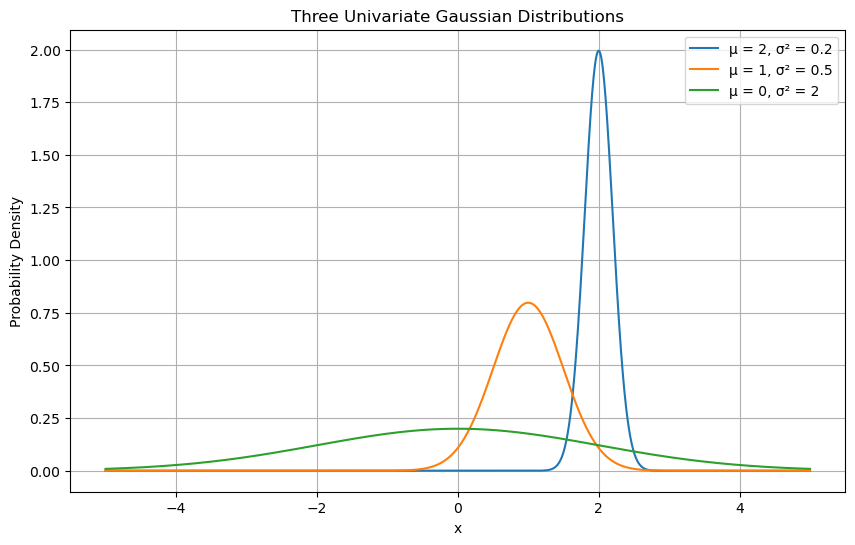

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define means and variances for the three Gaussian distributions
means = [2, 1, 0]
variances = [0.2, 0.5, 2]

# Create a common x-axis for all distributions
x = np.linspace(-5, 5, 1000)

# Define the Gaussian distribution function
def gaussian(x, mu, sigma):
  return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# Plot each Gaussian distribution with a different color
plt.figure(figsize=(10, 6))
for i, (mean, variance) in enumerate(zip(means, variances)):
  plt.plot(x, gaussian(x, mean, variance), label=f"μ = {mean}, σ² = {variance}", color=f'C{i}')

# Add labels and title
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Three Univariate Gaussian Distributions")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

b) Make a 3D plot of p(x,y) for a bivariate Gaussian with mean (0,0) and covariance matrix.
0.5 0.8
0.8 2.0
Be sure to provide a caption.

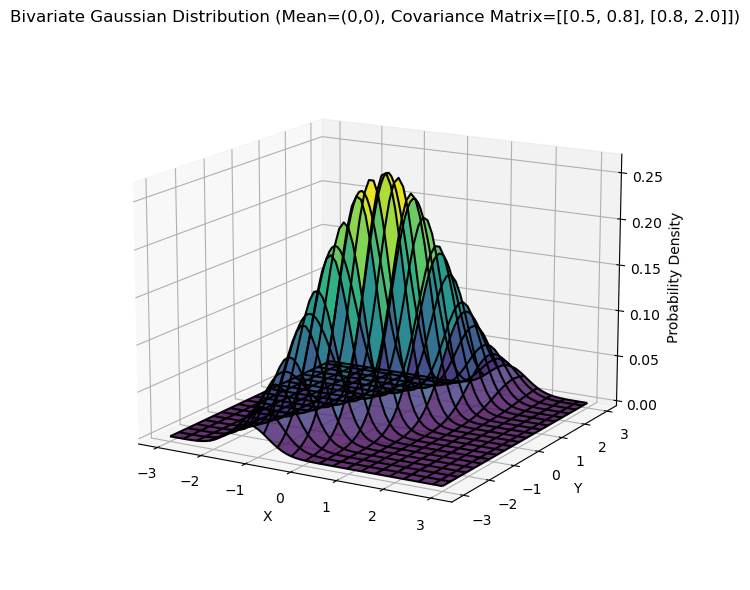

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the mean vector and covariance matrix
mean = np.array([0, 0])
cov = np.array([[0.5, 0.8], [0.8, 2.0]])

# Generate a grid of x and y values
x = np.linspace(-3, 3, 60)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)

# Calculate the probability density for each point in the grid
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, sigma):
  """
  This function calculates the multivariate Gaussian probability density function.
  """
  n = mu.shape[0]
  sigma_det = np.linalg.det(sigma)
  sigma_inv = np.linalg.inv(sigma)
  N = np.sqrt((2*np.pi)**n * sigma_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, sigma_inv, pos-mu)
  return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mean, cov)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Plot the surface and a wireframe for better visualization
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0.2, alpha=0.8, cmap='viridis')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='black')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('Bivariate Gaussian Distribution (Mean=(0,0), Covariance Matrix=[[0.5, 0.8], [0.8, 2.0]])')

# Adjust viewing angles for a better perspective
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.tight_layout()
plt.show()


6. For the bivariate Gaussian in part (b) of problem 5, using numerical integration, approximate
p(x) for a sensible stepping of x values and plot the result. Be sure to provide a caption. Does
it have the shape you expect, and what is that shape?

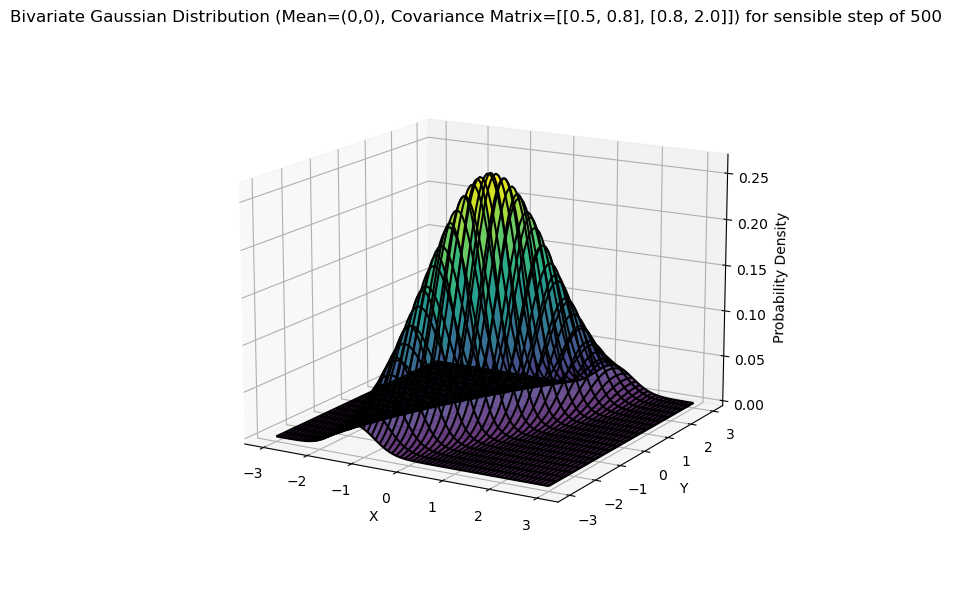

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the mean vector and covariance matrix
mean = np.array([0, 0])
cov = np.array([[0.5, 0.8], [0.8, 2.0]])

# Define the range and number of steps for numerical integration

num_steps = 200


# Generate a grid of x and y values
x = np.linspace(-3, 3, num_steps)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)

# Calculate the probability density for each point in the grid
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, sigma):
  """
  This function calculates the multivariate Gaussian probability density function.
  """
  n = mu.shape[0]
  sigma_det = np.linalg.det(sigma)
  sigma_inv = np.linalg.inv(sigma)
  N = np.sqrt((2*np.pi)**n * sigma_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, sigma_inv, pos-mu)
  return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mean, cov)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Plot the surface and a wireframe for better visualization
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0.2, alpha=0.8, cmap='viridis')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='black')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('Bivariate Gaussian Distribution (Mean=(0,0), Covariance Matrix=[[0.5, 0.8], [0.8, 2.0]]) for sensible step of 500  ')

# Adjust viewing angles for a better perspective
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.tight_layout()
plt.show()


7. For the bivariate Gaussian in part (b) of problem 5, plot p(x|y=2.0) . Be sure to provide a
good caption.Does it have the shape you expect, and what is that shape? What do you expect
the area of the curve to be?

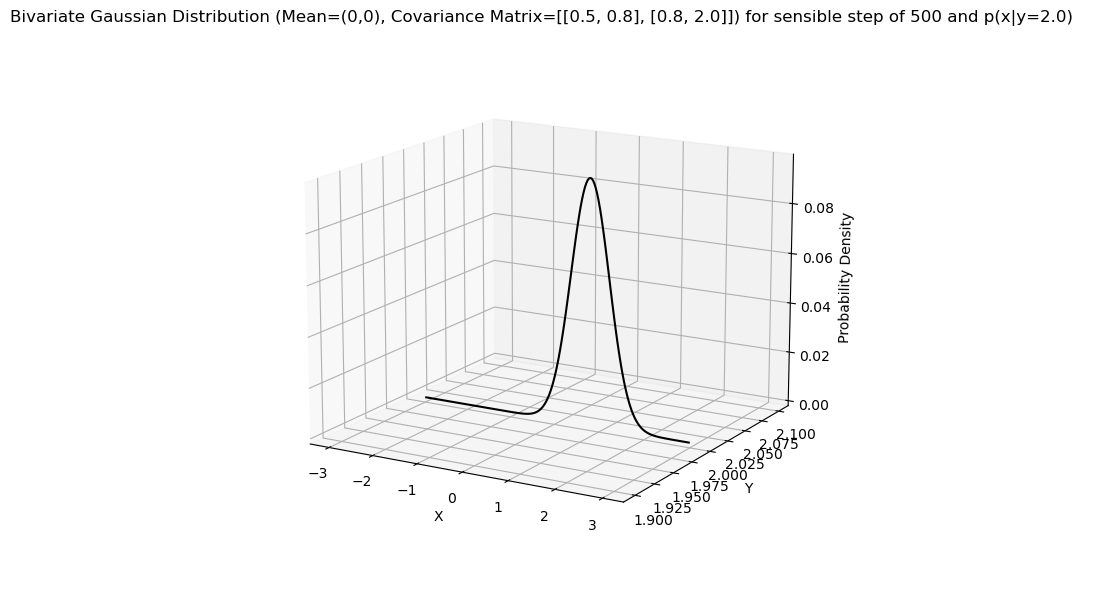

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the mean vector and covariance matrix
mean = np.array([0, 0])
cov = np.array([[0.5, 0.8], [0.8, 2.0]])

# Define the range and number of steps for numerical integration
y = 2.0
num_steps = 200


# Generate a grid of x and y values
x = np.linspace(-3, 3, num_steps)

X, Y = np.meshgrid(x, y)

# Calculate the probability density for each point in the grid
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, sigma):
  """
  This function calculates the multivariate Gaussian probability density function.
  """
  n = mu.shape[0]
  sigma_det = np.linalg.det(sigma)
  sigma_inv = np.linalg.inv(sigma)
  N = np.sqrt((2*np.pi)**n * sigma_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, sigma_inv, pos-mu)
  return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mean, cov)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Plot the surface and a wireframe for better visualization
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0.2, alpha=0.8, cmap='viridis')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='black')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('Bivariate Gaussian Distribution (Mean=(0,0), Covariance Matrix=[[0.5, 0.8], [0.8, 2.0]]) for sensible step of 500 and p(x|y=2.0)  ')

# Adjust viewing angles for a better perspective
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.tight_layout()
plt.show()

8. Random images
Read the tiger.txt file in as a matrix. The number ofrows in matrix should be the number of lines in
the file.
A. Display the matrix as a grayscale image, and put the image into your report.
B. Provide bar plots for the histogram counts for the grey values of the tiger image and one of the
random images that you used in the preceding question. Provide similar plots where the counts
have been converted to empirical probabilities by scaling them so that they sum to one. Put the
plots into your PDF with an informative caption.
C. Grayscale means that each pixel has a brightness represented by 8 bits per pixel (256 shades of
gray). This means that the grayscale tiger image could be thought of as a (uniform) random sample
ofan integer between 0 to 255, repeated for each pixel in the 236x364 grid. Create two images that
are such random samples and put them into your report. [Three sub-figures side by side probably
works best]. Are thenew images recognizable as scenes in the world like the tiger image? [Hint:
Create and display some additional examples as needed (but do not put them into your report) to
comment on (a) the difference (if any) between the random examples and whether a different
random seed would change your conclusions, and (b) the relationship (if any) between the
generated random images and everyday visual content, and (c) does this experiment tell you
anything about everyday visual content.]

D. Can you estimate how many times on average you would have to sample grayscale images of size
(236, 364) toget the exact tiger image. Assume that the universe has a single copy of each of these
images (like a deck of cards), and gives you one at a time. When all images have been handed out,
it stops.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def count_lines_generator(filename):
  
  """
  Counts the number of lines in a text file using a generator expression.
  """
  with open(filename, 'r') as f:
    num_lines = sum(1 for _ in f)
  return num_lines


filename = "R:\\Downloads\\tiger.txt"
image = np.genfromtxt(filename, delimiter=' ', dtype=int)
num_lines = count_lines_generator(filename)
print(f"The file '{filename}' has {num_lines} lines.")



The file 'R:\Downloads\tiger.txt' has 236 lines.


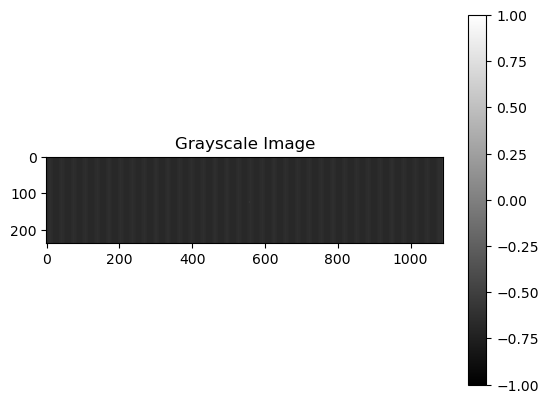

In [36]:
plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
plt.title('Grayscale Image')
plt.colorbar()  # Optional: Display a colorbar for intensity levels
plt.show()

In [43]:
# Calculate the histogram counts for the grayscale values
grayscale_hist, bins = np.histogram(image.flatten(), bins=np.arange(0, 5))

# Calculate the empirical probabilities (normalized histogram counts)
grayscale_hist_proba = grayscale_hist / grayscale_hist.sum()


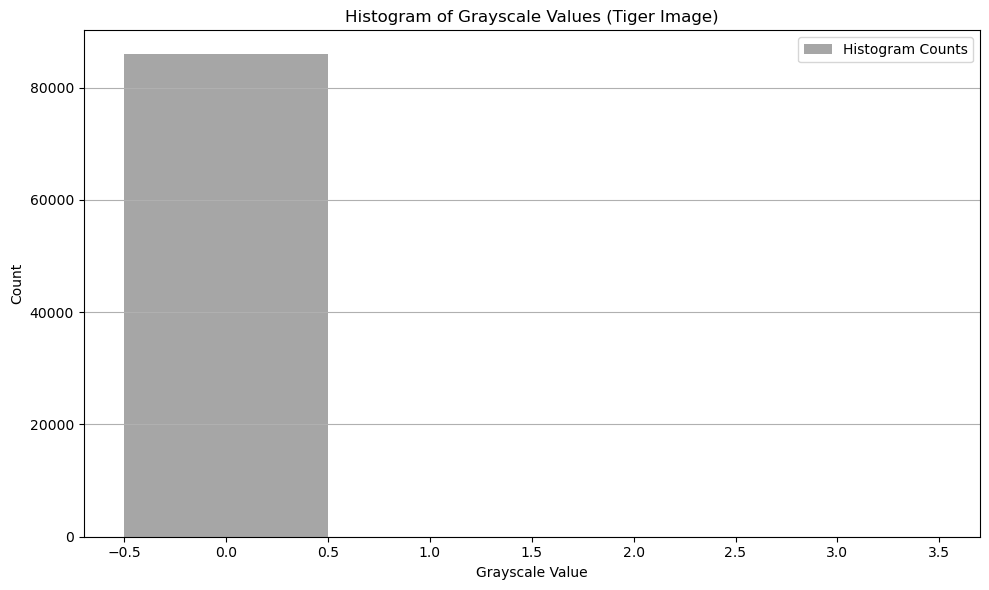

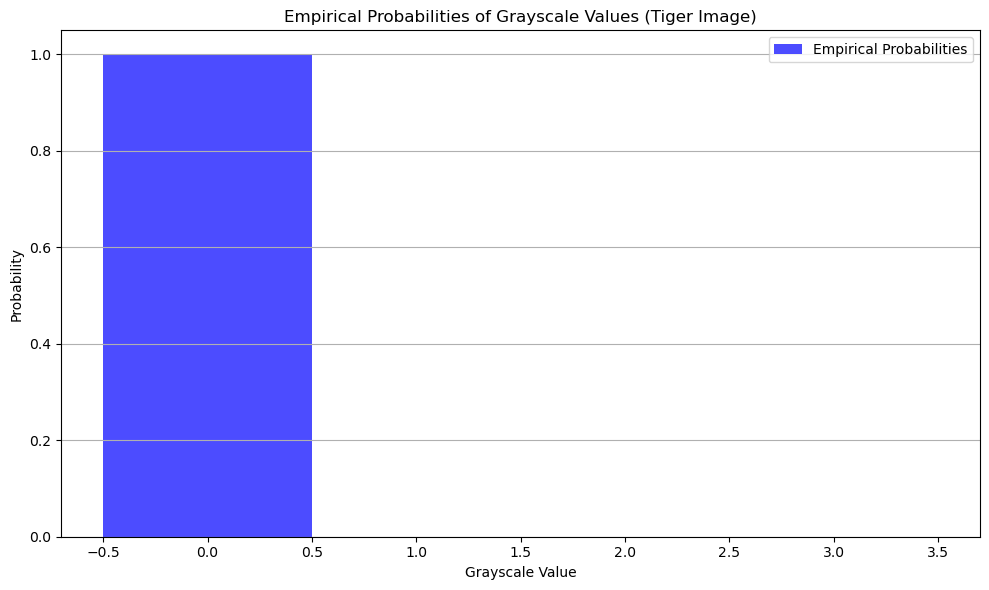

In [44]:
# Create bar plots for histogram counts
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], grayscale_hist, width=bins[1] - bins[0], color='gray', alpha=0.7, label='Histogram Counts')
plt.xlabel('Grayscale Value')
plt.ylabel('Count')
plt.title('Histogram of Grayscale Values (Tiger Image)')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Create bar plots for empirical probabilities
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], grayscale_hist_proba, width=bins[1] - bins[0], color='blue', alpha=0.7, label='Empirical Probabilities')
plt.xlabel('Grayscale Value')
plt.ylabel('Probability')
plt.title('Empirical Probabilities of Grayscale Values (Tiger Image)')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

Generated three random grayscale images!


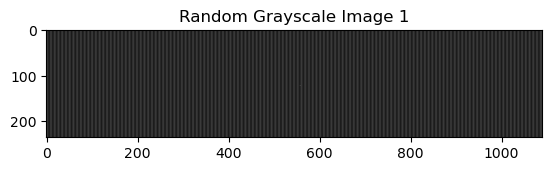

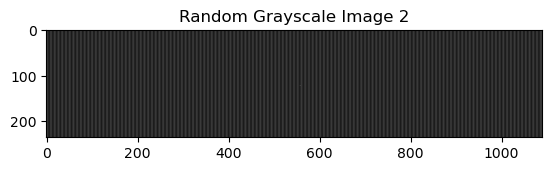

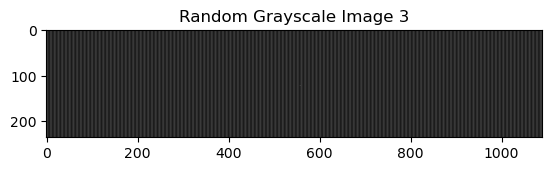

In [49]:
import numpy as np
from PIL import Image


width = 236
height = 364

# Generate random grayscale values (uniform distribution between 0 and 255)
random_data1 = np.random.randint(0, 256, size=(height, width))
random_data2 = np.random.randint(0, 256, size=(height, width))
random_data3 = np.random.randint(0, 256, size=(height, width))

# Convert data to uint8 for image format compatibility
random_data1 = random_data1.astype(np.uint8)
random_data2 = random_data2.astype(np.uint8)
random_data3 = random_data3.astype(np.uint8)

# Create Pillow image objects
image1 = Image.fromarray(random_data1, mode='L')  # 'L' for grayscale mode
image2 = Image.fromarray(random_data2, mode='L')
image3 = Image.fromarray(random_data3, mode='L')

# Save the images (replace 'random_image1.png' and 'random_image2.png' with desired filenames)
image1.save('random_image1.png')
image2.save('random_image2.png')
image3.save('random_image3.png')

print("Generated three random grayscale images!")

plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
plt.title('Random Grayscale Image 1')
plt.show(image1)
plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
plt.title('Random Grayscale Image 2')
plt.show(image2)
plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
plt.title('Random Grayscale Image 3')
plt.show(image3)


Yes we can estimate the average number of samples needed to get the exact tiger image using the concept of harmonic series.
Approach:
1. Total Number of Images: (256 ^ (236*364)) gives us a large number
2. Probability of getting the tiger image: 1/ total images
3. Harmonic series can be used when the probability of success is low which states that 
Average trials ≈ 1/ probability(tiger) ≈ total images

calculating the exact total number of images is computationally infeasible. However we can estimate the magnitude. Assuming 256 grayscale values per pixel 
 Total images ≈ (256 ^ (236 *364 ) ≈ 256^85896